# Basic classification: W tagging

## Load the environment

### modify backend and image data format

``` shell
vim $HOME/.keras/keras.json
```

Default configurations: 

``` json
{
    "image_data_format": "channels_last", //change this to channels_first. this depends on the image format. See explorer data blow
    "epsilon": 1e-07,
    "floatx": "float32",
    "backend": "tensorflow"  //choose the backend you want， here we use theano
}
```

My configurations:

``` json
{
    "floatx": "float32",
    "epsilon": 1e-07,
    "backend": "theano",
    "image_data_format": "channels_first"
}
```


In [2]:
from array import array
import h5py
import numpy as np
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


## Import the dataset

Dataset from UCI database: http://mlphysics.ics.uci.edu/data/hepjets/images/

They are low-level calorimeter images.


In [3]:
train_file = h5py.File("/Volumes/MacOS/Research/train_no_pile_10000000.h5", "r")
test_file = h5py.File("/Volumes/MacOS/Research/test_no_pile_5000000.h5", "r")

X_train = train_file['features']
X_test = test_file['features']

y_train = train_file['targets']
y_test = test_file['targets']

In [4]:
# N_train = len(X_train)
# N_test = len(X_test)
N_train = N_test = 60000
train_images=np.array(X_train[0:N_train])
train_labels=np.array(y_train[0:N_train])

test_images=np.array(X_test[0:N_test])
test_labels=np.array(y_test[0:N_test])


class_names = ['QCD jets', 'W -> qq']

## Explore the data

In [5]:
X_train.shape

(10000000, 1, 32, 32)

Image size is 32 x 32  
Channel: grayscale  
Number of samples: 10 million  
Image data format: channels_first (channels, length, width)  

Note: 
RGB channel: 3

In [ ]:
print(train_images.shape[0] == len(train_labels))
print(test_images.shape[0] == len(test_labels))

In [6]:
train_labels

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [7]:
class_names[int(train_labels[0])]

'W -> qq'

## Preprocess the data

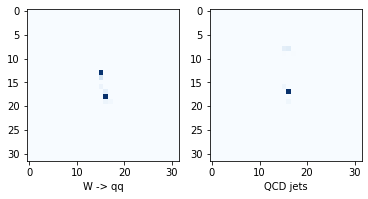

In [11]:
plt.subplot(1,2,1)
plt.imshow(train_images[0,0], cmap=plt.cm.Blues)
#plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[int(train_labels[0])])
plt.subplot(1,2,2)
plt.imshow(train_images[1,0], cmap=plt.cm.Blues)
#plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[int(train_labels[1])])

plt.savefig('image_read')
plt.show()

The pixel values fall in the range of 0 to 255.
Scale these values to a range of 0 to 1 before feeding them to the neural network model.

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

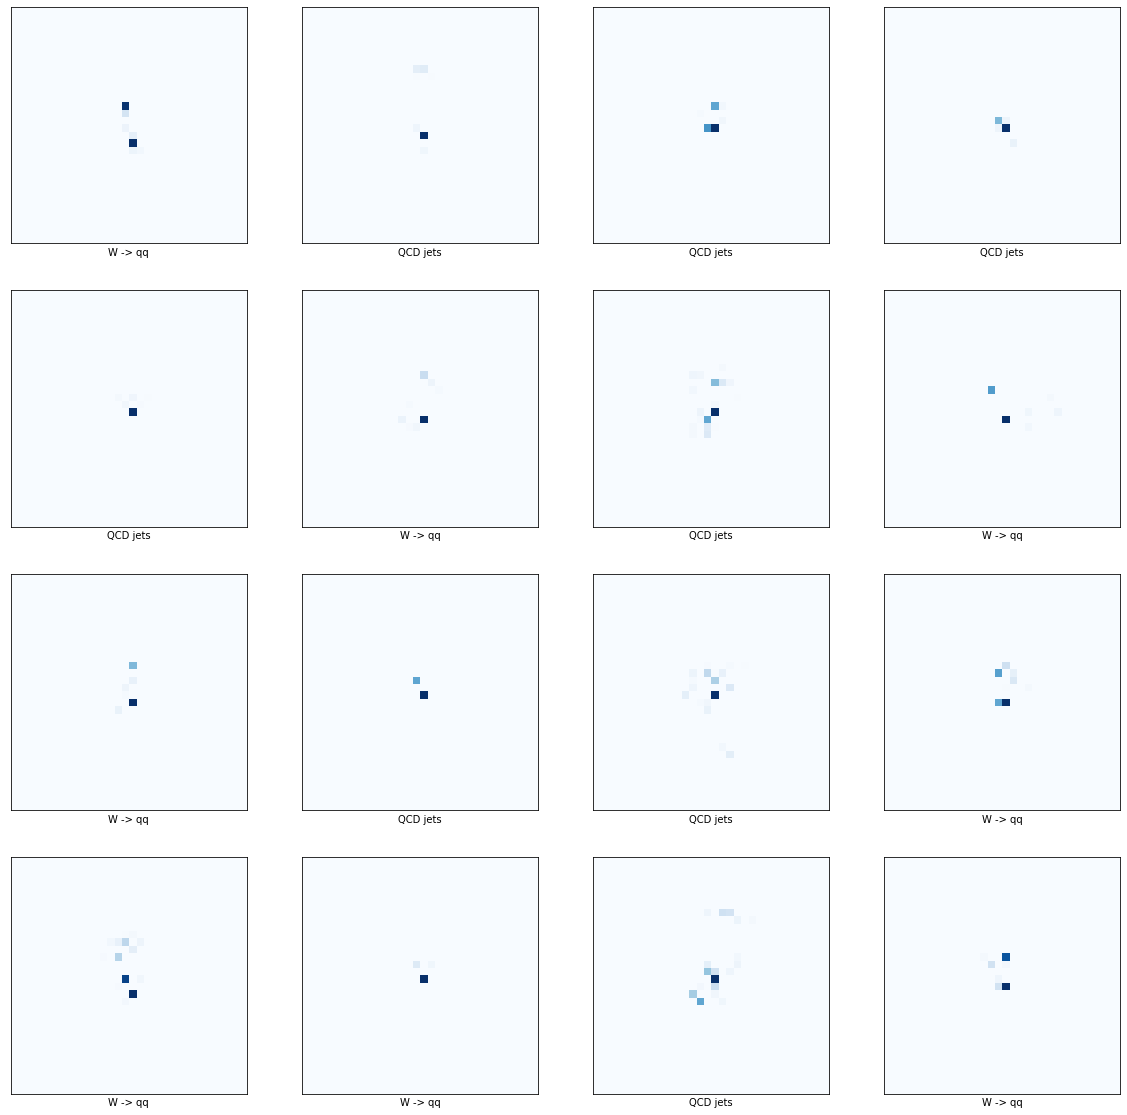

In [10]:
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i,0], cmap=plt.cm.Blues)
    plt.xlabel(class_names[int(train_labels[i])])
               
plt.show()

## Average jet images

In [11]:
average_W = np.zeros((32, 32), dtype=float)
average_QCD = np.zeros((32, 32), dtype=float)

N_train_W = 0
N_train_QCD = 0

for i in range(N_train):
    if train_labels[i] == 1.0 :
        average_W = average_W + train_images[i, 0]
        N_train_W = N_train_W + 1
        pass
    else : 
        average_QCD = average_QCD + train_images[i, 0]
        N_train_QCD = N_train_QCD + 1
    pass

average_W = average_W / N_train_W
average_QCD = average_QCD / N_train_QCD

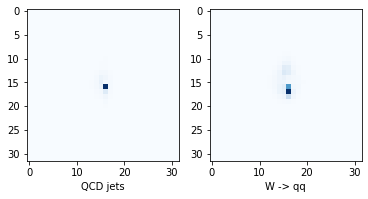

In [31]:
plt.subplot(1,2,1)
plt.imshow(average_QCD, cmap=plt.cm.Blues)
plt.xlabel(class_names[0])

plt.subplot(1,2,2)
plt.imshow(average_W, cmap=plt.cm.Blues)
plt.xlabel(class_names[1])

plt.savefig('aver_Jet.eps')

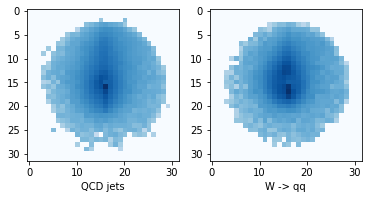

In [32]:
plt.subplot(1,2,1)
plt.imshow(np.log(np.maximum(1e-10, average_QCD)), cmap=plt.cm.Blues)
plt.xlabel(class_names[0])

plt.subplot(1,2,2)
plt.imshow(np.log(np.maximum(1e-10, average_W)), cmap=plt.cm.Blues)
plt.xlabel(class_names[1])

plt.savefig('aver_Jet_log.eps')

## Build the model 

In [ ]:
### Set up the layers

In [90]:
del model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(1, 32, 32)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2)
])


In [ ]:
### Compile the model

In [91]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
### Train the model

In [92]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.4185 - accuracy: 0.8194
Epoch 2/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.3510 - accuracy: 0.8544
Epoch 3/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.3303 - accuracy: 0.8654
Epoch 4/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.3196 - accuracy: 0.8711
Epoch 5/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.3123 - accuracy: 0.8755
Epoch 6/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.3073 - accuracy: 0.8773
Epoch 7/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.3016 - accuracy: 0.8804
Epoch 8/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.2976 - accuracy: 0.8813
Epoch 9/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.2939 - accuracy: 0.8844
Epoch 10/10
60000/60000 [==============================

In [6]:
### Evaluate accuracy

In [79]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)


60000/60000 [==============================] - 1s 9us/step

Test loss: 0.31664343220392865

Test accuracy: 0.8730000257492065


In [1]:
### Make predictions

NameError: name 'keras' is not defined

In [44]:
probability_model = keras.Sequential([model, 
                                         keras.layers.Softmax()])

In [45]:
predictions = probability_model.predict(test_images)


In [46]:
predictions[0]                               

array([0.03136937, 0.9686306 ], dtype=float32)

In [47]:
np.argmax(predictions[0])


1

### Verify predictions

In [72]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i,0]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.Blues)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Pre: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[int(true_label)]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[int(true_label)].set_color('blue')



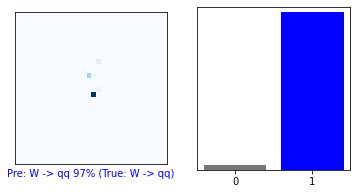

In [73]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


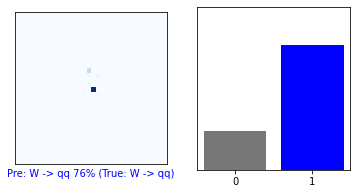

In [74]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


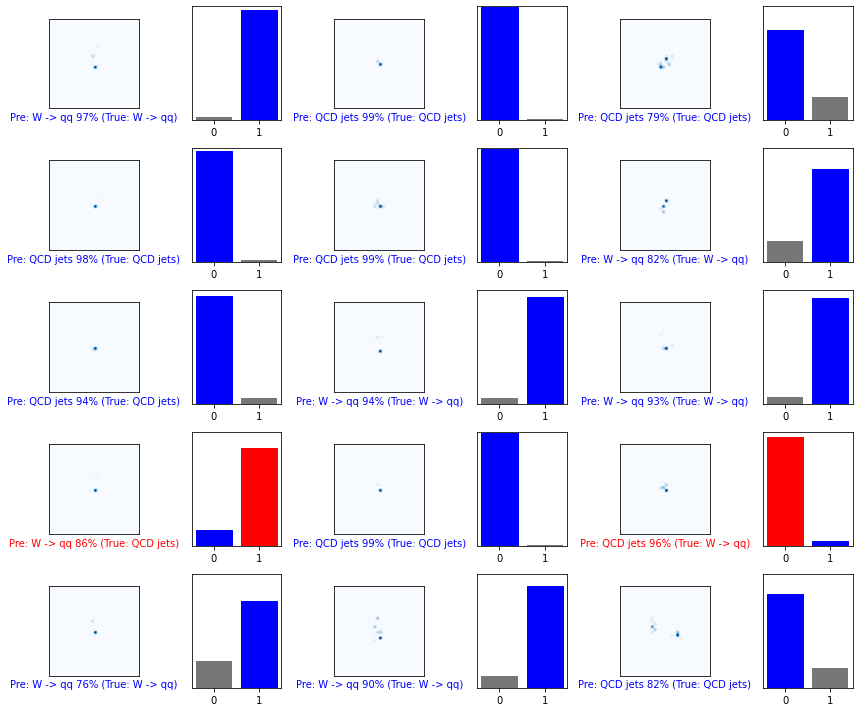

In [75]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [77]:
predictions.shape

(60000, 2)

In [78]:
predictions[0]

array([0.03136937, 0.9686306 ], dtype=float32)

## Accuracy & Loss plots

In [86]:
#history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)
history = model.fit(train_images, train_labels, validation_split=0.2, epochs=50)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 50us/step - loss: 0.2206 - accuracy: 0.9180 - val_loss: 0.2793 - val_accuracy: 0.8960
Epoch 2/50
48000/48000 [==============================] - 2s 49us/step - loss: 0.2199 - accuracy: 0.9178 - val_loss: 0.2779 - val_accuracy: 0.8952
Epoch 3/50
48000/48000 [==============================] - 3s 60us/step - loss: 0.2182 - accuracy: 0.9182 - val_loss: 0.2815 - val_accuracy: 0.8938
Epoch 4/50
48000/48000 [==============================] - 3s 57us/step - loss: 0.2169 - accuracy: 0.9200 - val_loss: 0.2819 - val_accuracy: 0.8938
Epoch 5/50
48000/48000 [==============================] - 3s 56us/step - loss: 0.2153 - accuracy: 0.9211 - val_loss: 0.2934 - val_accuracy: 0.8885
Epoch 6/50
48000/48000 [==============================] - 3s 61us/step - loss: 0.2147 - accuracy: 0.9202 - val_loss: 0.2896 - val_accuracy: 0.8937
Epoch 7/50
48000/48000 [==============================] - 3s 57us/st

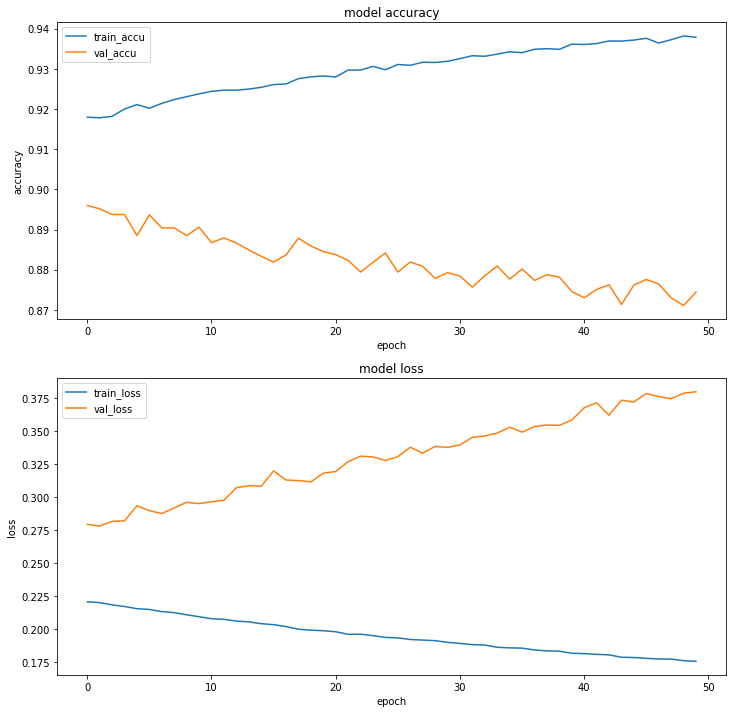

In [97]:
plt.figure(figsize=(12, 12))
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accu', 'val_accu'], loc='upper left') 
plt.subplot(2,1,2)
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left') 

plt.savefig("performance")
plt.show()


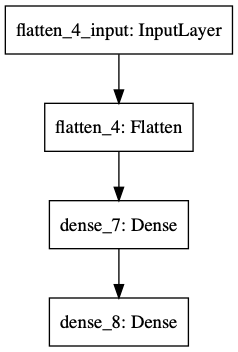

In [93]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

Configurations: 
Frame: Keras and Theano 

4 locally-connected layers, followded by 4 fully-connected layers 
425 units per layers

hidden layers: tanh units 
logistic output 
Cross-entropy loss

ADAM optimizer: Beta_1 = 0.9, Beta 2 = 0.999, epsilon = 1e-08
Minimum batches of size 100 

Weights normal distribution 

learning rate 0.0001 
decay factor 0.9 
maximum 50 epochs

training dataset : 10 million examples
validation set: 500 thousand
Test dataset: 5 million examples